## 0 - Introduction

Welcome to the <span style="color:yellowgreen">Foundations of Machine Learning</span> (ECE5984_41) course!

This is the <span style="color:red">4th</span> lab practice. From now on, you will going to implement PCA, t-SNE

## 1. Packages 

You have to install and use below packages for HW#4.
- [numpy](https://www.numpy.org): Fundamental package for matrix computation with python.
- [matplotlib](https://matplotlib.org): Package for visualization of the graph with python.
- [scikit-learn](https://scikit-learn.org/stable/):  Python module for machine learning built on top of SciPy

**Do not use other machine learning packages in this homework, e.g., *tensorflow*, *pytorch*, *jax*, etc.<br/>**
**And partial use of scikit-learn is permitted.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mplcolors
import sklearn.datasets as skdatasets

# 2. PCA(Principle Component Analysis)

### 2.1. Load iris dataset

In [2]:
def load_iris_dataset():
    # import data
    iris = skdatasets.load_iris()
    # only take the first two features
    X = iris.data[:, :2]
    y = iris.target
    return X, y

### 2.2. Implement a function for PCA (Principal Component Analysis).

In [3]:
# Compute the covariance matrix
def compute_covariance_matrix(X):
    return np.cov(X.T)

# Select top k eigenvectors
def select_top_k_eigenvectors(eigenvectors, k):
    return eigenvectors[:, :k]

# Sort eigenvalues and eigenvectors
def sort_eigenvalues_and_eigenvectors(eigenvalues, eigenvectors):
    ###################################################################################
    # TODO: Implement the Sort eigenvalues and eigenvectors function using numpy      #
    ###################################################################################
    # ************* START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ************* # 

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    sorted_eigenvalues = eigenvalues; sorted_eigenvectors = eigenvectors

    # ************* END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ************* #
    return sorted_eigenvalues, sorted_eigenvectors

# Standardize the dataset
def standardize_data(X):
    #########################################################################
    # TODO: Implement the Standardize the dataset function using numpy      #
    #########################################################################
    # ******** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ******** #
    
    X_standardized = ( X - np.mean(X, axis=0) )  / np.std(X, axis=0)

    # ********* END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********* #
    return X_standardized

# Compute eigenvalues and eigenvectors
def compute_eigenvalues_and_eigenvectors(X):
    ######################################################################################
    # TODO: Implement the Compute eigenvalues and eigenvectors function using numpy      #
    ######################################################################################
    # ************** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) *************** #          

    eigenvalues, eigenvectors = np.linalg.eig(X)

    # ************** END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) *************** #
    return eigenvalues, eigenvectors

# Transform the data
def transform_data(X, eigenvectors):
    ################################################################
    # TODO: Implement the transform data function using numpy      #
    ################################################################
    # **** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) **** # 

    X_transformed = X @ eigenvectors

    # ***** END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ***** #
    return X_transformed

### 2.3. Implement PCA & Explained variance

In [5]:
def My_PCA(X, components=2):
    ##########################################################################
    # TODO: Implement PCA using the function implemented in section 2.2      #
    ##########################################################################    
    # ******** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********* #

    X_standardlized = standardize_data(X)
    sigma_matrix = compute_covariance_matrix(X_standardlized)
    eigenvalues, eigenvectors = compute_eigenvalues_and_eigenvectors(sigma_matrix)
    sorted_eigenvalues, sorted_eigenvectors = sort_eigenvalues_and_eigenvectors(eigenvalues, eigenvectors)
    principle_component = select_top_k_eigenvectors(sorted_eigenvectors, components)
    X_pca = transform_data(X_standardlized, principle_component)

    # ********* END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********** #    
    
    return X_pca
    

### 2.4 Do PCA & Visulaize the result

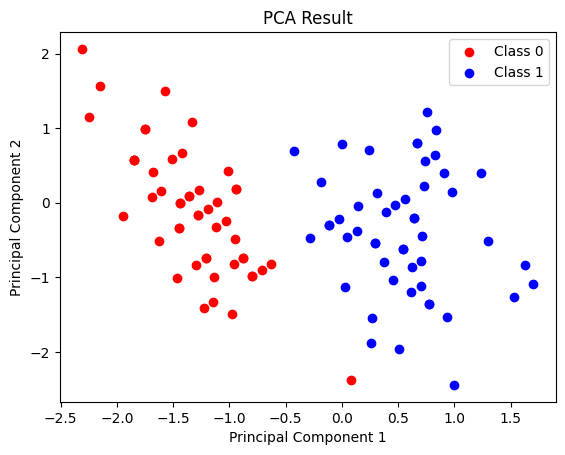

In [6]:
X, y = load_iris_dataset()
X_pca = My_PCA(X, components=3)

def visualize_PCA_result(X_transformed, y):
    # Use different colors for different classes
    colors = ['r', 'b']
    for i in range(len(colors)):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1], c=colors[i], label=f'Class {i}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Result')
    plt.legend()
    plt.show()

visualize_PCA_result(X_pca, y)

# 3. t-SNE

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## 3.1 data load

In [8]:
# import the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

## 3.2 Apply PCA & t-SNE using scikit-learn

In [9]:
# Apply PCA
def pca(X, n_componets=2):
    ##########################################################################
    # TODO: Apply PCA using sckit-learn                                      #
    ##########################################################################    
    # ******** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********* #
    
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)
    
    pca = PCA(n_components=n_componets)
    X_PCA = pca.fit_transform(X_standardized)    
    
    # ******** END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********** #
    
    return X_PCA

# Apply t-SNE
def t_sne(X, n_componets=2):
    ##########################################################################
    # TODO: Apply t-SNE using sckit-learn                                    #
    ##########################################################################    
    # ******** START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********* #

    from sklearn.preprocessing import StandardScaler
    
    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    tsne = TSNE(n_components=n_componets)
    X_tsne = tsne.fit_transform(X_standardized)    
 
    # ******** END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE) ********** #

    return X_tsne

### 3.3 Visulaize the results

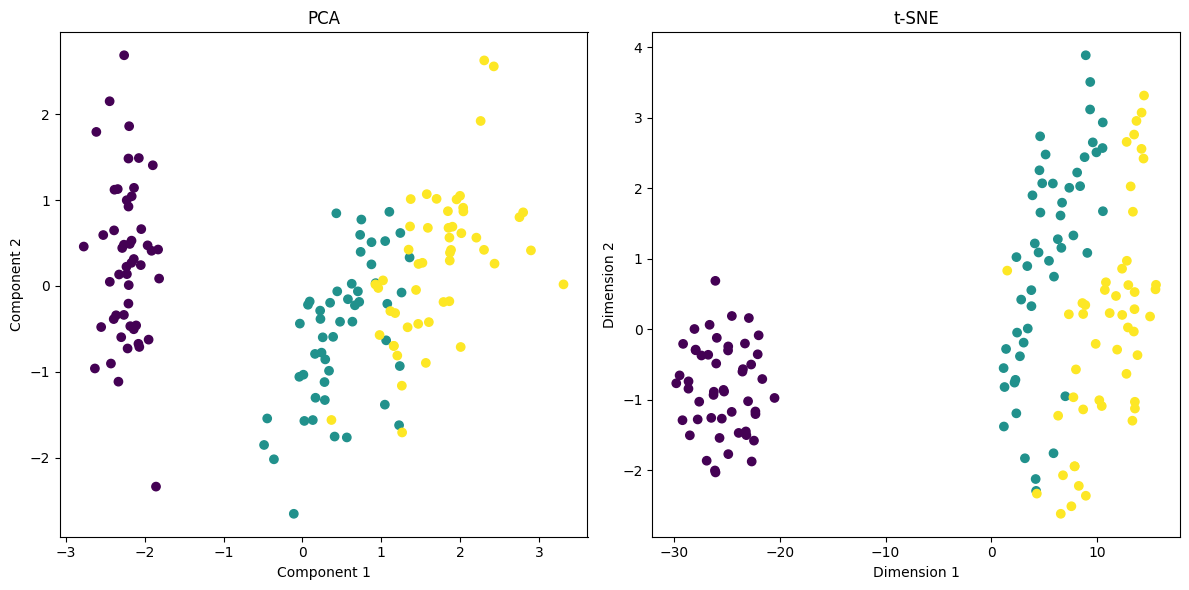

In [10]:
# Apply PCA
X_PCA = pca(X, n_componets=2)

# Plot PCA results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y, cmap=plt.cm.viridis)
plt.title('PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Apply t-SNE
X_tsne = t_sne(X, n_componets=2)

# Plot t-SNE results
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.viridis)
plt.title('t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.tight_layout()
plt.show()